In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
#import scipy as sp
#import scipy.stats as stats
import time
import itertools
#import statsmodels.api as sm
import numpy.ma as ma
#from scipy.stats.stats import pearsonr, normaltest
#from scipy.spatial.distance import correlation
from sklearn.model_selection import train_test_split
#os.getcwd()
#os.chdir(r'C:\Users\Haneef Usmani\Desktop\STAT 303-2\Project')

In [9]:
flights = pd.read_csv('flights_clean.csv')

In [4]:
flights_numerical = pd.read_csv('flights_clean_numerical.csv').sample(10000)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (397, 4031919) and data type int64

In [ ]:
columns_subset = \
    list(flights.columns.difference(['airline', 'destination_airport',
                                     'origin_airport', 'state_destination', 'state_origin']))
columns_subset += [
    'airline_AS', 'airline_NK', 'airline_UA',
    'destination_airport_BTV', 'destination_airport_DTW', 'destination_airport_FNT', 
    'origin_airport_CMH', 'origin_airport_IAD', 'origin_airport_LNK', 'origin_airport_RIC',
    'state_destination_MI', 'state_destination_VT', 'state_origin_NE'
]
flights_numerical_significant = flights_numerical[columns_subset]

In [4]:
train, test = train_test_split(flights, test_size=0.2)

In [10]:
# what is the standard deviation of departure delay?
np.std(train['departure_delay'])

37.82263087988047

In [12]:
train_sample = train.sample(10000)

In [15]:
model_all = smf.ols(formula='departure_delay ~ airline + day + day_of_week + destination_airport + destination_latitude + destination_longitude + distance + month + origin_airport + origin_latitude + origin_longitude + scheduled_arrival + scheduled_departure + scheduled_time + state_destination + state_origin + taxi_in + taxi_out + day_of_year + origin_temperature + destination_temperature', data=train).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        departure_delay   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:55:03   Log-Likelihood:            -1.6240e+07
No. Observations:             3225535   AIC:                         3.248e+07
Df Residuals:                 3225229   BIC:                         3.248e+07
Df Model:                         305                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -16.5051      0.484    -34.128      0.000     -17.453     -15.557
airline[T.AS]                 -4.3478      0.175    -24.880      0.000      -4.690      -4.005
airline[T.B6]                  3.3427      0.158     21.200      0.000       3.034       3.652
airline[T.DL]                  0.8554      0.111      7.676      0.000       0.637       1.074
airline[T.EV]                  2.0078      0.126     15.949      0.000       1.761       2.255
airline[T.F9]                  6.8983      0.185     37.227      0.000       6.535       7.261
airline[T.HA]                 -4.1082      0.520     -7.894      0.000      -5.128      -3.088
airline[T.MQ]                  2.6693      0.138     19.288      0.000       2.398       2.941
airline[T.NK]                 10.3659      0.183     56.611      0.000      10.007      10.725
airline[T.OO]                  2.8616      0.124     23.121      0.000       2.619       3.104
airline[T.UA]                  6.1997      0.111     55.644      0.000       5.981       6.418
airline[T.US]                 -1.8657      0.140    -13.342      0.000      -2.140      -1.592
airline[T.VX]                  0.2727      0.208      1.311      0.190      -0.135       0.680
airline[T.WN]                  6.3863      0.108     59.129      0.000       6.175       6.598
destination_airport[T.ABI]    -4.3505      0.849     -5.123      0.000      -6.015      -2.686
destination_airport[T.ABQ]    -0.4694      0.156     -3.004      0.003      -0.776      -0.163
destination_airport[T.ABY]    -0.3491      1.149     -0.304      0.761      -2.602       1.904
destination_airport[T.ACT]     2.4240      1.013      2.393      0.017       0.439       4.409
destination_airport[T.ACY]    -4.7044      0.642     -7.324      0.000      -5.963      -3.445
destination_airport[T.ALB]    -1.6802      0.445     -3.777      0.000      -2.552      -0.808
destination_airport[T.AMA]    -1.2916      0.634     -2.037      0.042      -2.534      -0.049
destination_airport[T.ANC]     9.1047      0.433     21.038      0.000       8.256       9.953
destination_airport[T.ATL]     1.2074      0.371      3.258      0.001       0.481       1.934
destination_airport[T.AUS]     1.5710      0.262      6.002      0.000       1.058       2.084
destination_airport[T.AVL]    -1.0457      0.708     -1.477      0.140      -2.433       0.342
destination_airport[T.BHM]     0.3222      0.384      0.838      0.402      -0.431       1.075
destination_airport[T.BIL]     1.1635      0.691      1.684      0.092      -0.191       2.518
destination_airport[T.BIS]    -0.9860      0.511     -1.931      0.054      -1.987       0.015
destination_airport[T.BNA]    -0.2841      0.243     -1.168      0.243      -0.761       0.193
destination_airport[T.BOI]     3.9420      

In [13]:
# print out all the coefficients that have p-values less than 0.05
model_all.pvalues[model_all.pvalues < 0.05]

airline[T.AS]                 1.231311e-02
airline[T.NK]                 4.549837e-03
airline[T.UA]                 3.631614e-02
destination_airport[T.BTV]    1.996103e-03
destination_airport[T.DTW]    4.102972e-02
destination_airport[T.FNT]    2.338799e-02
origin_airport[T.CMH]         6.059449e-03
origin_airport[T.IAD]         3.443459e-02
origin_airport[T.LNK]         4.931520e-02
origin_airport[T.RIC]         4.124795e-05
state_destination[T.MI]       4.049174e-03
state_destination[T.VT]       1.996103e-03
state_origin[T.NE]            9.716223e-05
day_of_week                   5.729489e-03
scheduled_arrival             1.679122e-02
scheduled_departure           3.279605e-11
taxi_out                      3.745860e-07
dtype: float64

<AxesSubplot:xlabel='day_of_week', ylabel='departure_delay'>

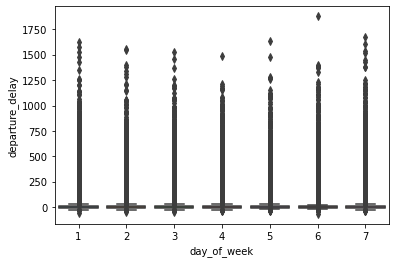

In [5]:
# which days of the week have the highest departure delays?
sns.boxplot(x='day_of_week', y='departure_delay', data=train)

In [6]:
# average departure delay by day of week
train.groupby('day_of_week')['departure_delay'].mean()

day_of_week
1    11.986941
2    10.366289
3     9.539220
4    10.927823
5     9.731792
6     8.333992
7    10.008471
Name: departure_delay, dtype: float64

In [7]:
pred_price = (model_all.predict(test))
np.sqrt(((pred_price - test.departure_delay)**2).mean())

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error converting data to categorical: observation with value 'ERI' does not match any of the expected levels (expected: ['ABE', 'ABI', ..., 'TUS', 'TYS'])
    departure_delay ~ airline + day + day_of_week + destination_airport + destination_latitude + destination_longitude + distance + month + origin_airport + origin_latitude + origin_longitude + scheduled_arrival + scheduled_departure + scheduled_time + state_destination + state_origin + taxi_in + taxi_out + day_of_year + origin_temperature + destination_temperature
                                                    ^^^^^^^^^^^^^^^^^^^

In [119]:
# drop all categorical variables from train
train_drop = train.drop(['airline', 'destination_airport', 'origin_airport', 'state_destination', 'state_origin'], axis=1)

In [120]:
X = train[['airline', 'day', 'day_of_week', 'destination_airport', 'destination_latitude', 'destination_longitude', 'distance', 'month', 'origin_airport', 'origin_latitude', 'origin_longitude', 'scheduled_arrival', 'scheduled_departure', 'scheduled_time', 'state_destination', 'state_origin', 'taxi_in', 'taxi_out', 'day_of_year', 'origin_temperature', 'destination_temperature']]
# take out all categorical variables
X = X.drop(['airline', 'destination_airport', 'origin_airport', 'state_destination', 'state_origin'], axis=1)

In [121]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('(departure_delay)~' + '+'.join(predictor_subset),data = train_drop).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [122]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [123]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [124]:
models_best = forward_selection()

Processed  16 models on 1 predictors in 7.810021877288818 seconds.
Processed  15 models on 2 predictors in 9.418032884597778 seconds.
Processed  14 models on 3 predictors in 12.509913206100464 seconds.
Processed  13 models on 4 predictors in 15.887221336364746 seconds.
Processed  12 models on 5 predictors in 17.792967557907104 seconds.
Processed  11 models on 6 predictors in 19.648821353912354 seconds.
Processed  10 models on 7 predictors in 18.72304916381836 seconds.
Processed  9 models on 8 predictors in 14.879640340805054 seconds.
Processed  8 models on 9 predictors in 15.141238451004028 seconds.
Processed  7 models on 10 predictors in 15.55549669265747 seconds.
Processed  6 models on 11 predictors in 14.283883094787598 seconds.
Processed  5 models on 12 predictors in 13.366007566452026 seconds.
Processed  4 models on 13 predictors in 11.649682998657227 seconds.
Processed  3 models on 14 predictors in 9.742460489273071 seconds.
Processed  2 models on 15 predictors in 7.2355272769927

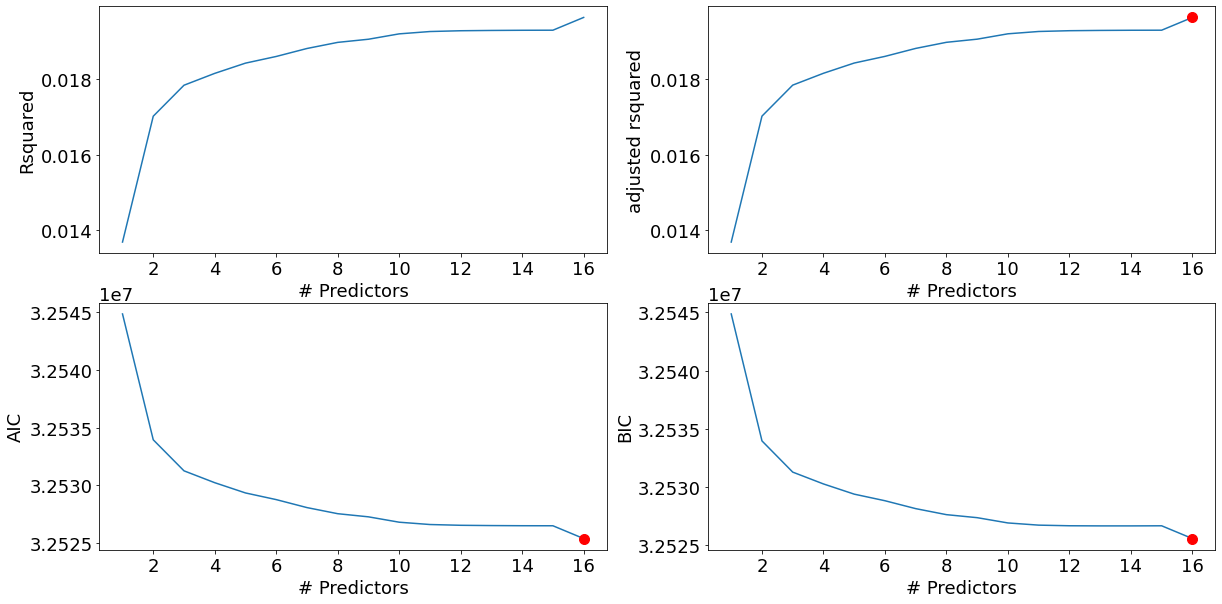

In [125]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [126]:
best_fwd_reg_model = models_best['model'][16]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        departure_delay   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     4037.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:26:42   Log-Likelihood:            -1.6263e+07
No. Observations:             3225535   AIC:                         3.253e+07
Df Residuals:                 3225518   BIC:                         3.253e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -30.7032      1.041    -29.493      0.000     -32.744     -28.663
scheduled_departure         0.0120   9.77e-05    122.969      0.000       0.012       0.012
taxi_out                    0.2214      0.002     92.861      0.000       0.217       0.226
scheduled_arrival           0.0044   9.26e-05     47.976      0.000       0.004       0.005
day_of_week                -0.3479      0.010    -33.162      0.000      -0.368      -0.327
taxi_in                     0.0909      0.004     24.449      0.000       0.084       0.098
scheduled_time              0.0217      0.003      8.460      0.000       0.017       0.027
destination_longitude       0.0291      0.002     15.814      0.000       0.025       0.033
day_of_year                -1.1430      0.034    -33.542      0.000      -1.210      -1.076
origin_latitude            -0.1256      0.005    -25.246      0.000      -0.135      -0.116
origin_temperature         -0.0447      0.002    -22.306      0.000      -0.049      -0.041
origin_longitude            0.0087      0.002      3.872      0.000       0.004       0.013
destination_latitude       -0.0426      0.005     -8.559      0.000      -0.052      -0.033
distance                   -0.0016      0.000     -5.043      0.000      -0.002      -0.001
destination_temperature    -0.0058      0.002     -2.884      0.004      -0.010      -0.002
month                      34.7156      1.038     33.442      0.000      32.681      36.750
day                         1.1370      0.034     33.350      0.000       1.070       1.204
==============================================================================
Omnibus:                  4355595.520   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2064803870.582
Skew:                           7.523   Prob(JB):                         0.00
Kurtosis:                     126.033   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_price = (best_fwd_reg_model.predict(test))
np.sqrt(((pred_price - test.departure_delay)**2).mean())

# flights_clean_numerical_significant.csv

In [6]:
flights = pd.read_csv('data/flights_clean_numerical_significant.csv')

In [7]:
#flights_numerical = pd.read_csv('flights_clean_numerical.csv').sample(10000)

In [8]:
train, test = train_test_split(flights, test_size=0.2)

In [9]:
# what is the standard deviation of departure delay?
np.std(train['departure_delay'])

37.7529641168215

In [10]:
train_sample = train.sample(10000)

In [12]:
#model_all = smf.ols(formula='departure_delay ~ airline + day + day_of_week + destination_airport + destination_latitude + destination_longitude + distance + month + origin_airport + origin_latitude + origin_longitude + scheduled_arrival + scheduled_departure + scheduled_time + state_destination + state_origin + taxi_in + taxi_out + day_of_year + origin_temperature + destination_temperature', data=train).fit()
#model_all.summary()

In [14]:
# print out all the coefficients that have p-values less than 0.05
#model_all.pvalues[model_all.pvalues < 0.05]

<AxesSubplot:xlabel='day_of_week', ylabel='departure_delay'>

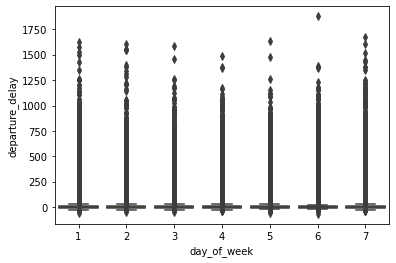

In [15]:
# which days of the week have the highest departure delays?
sns.boxplot(x='day_of_week', y='departure_delay', data=train)

In [16]:
# average departure delay by day of week
train.groupby('day_of_week')['departure_delay'].mean()

day_of_week
1    11.991342
2    10.440873
3     9.527755
4    10.908889
5     9.717211
6     8.335112
7    10.013867
Name: departure_delay, dtype: float64

In [18]:
#pred_price = (model_all.predict(test))
#np.sqrt(((pred_price - test.departure_delay)**2).mean())

In [22]:
# drop all categorical variables from train
train_drop = train#.drop(['airline', 'destination_airport', 'origin_airport', 'state_destination', 'state_origin'], axis=1)

In [26]:
# take out all categorical variables
X = train_drop.drop(['departure_delay'], axis=1)

In [27]:
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.ols('(departure_delay)~' + '+'.join(predictor_subset),data = train_drop).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [28]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [29]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [30]:
models_best = forward_selection()

Processed  29 models on 1 predictors in 26.458106994628906 seconds.
Processed  28 models on 2 predictors in 37.76831412315369 seconds.
Processed  27 models on 3 predictors in 47.11525201797485 seconds.
Processed  26 models on 4 predictors in 57.05825901031494 seconds.
Processed  25 models on 5 predictors in 67.32908821105957 seconds.
Processed  24 models on 6 predictors in 75.53653573989868 seconds.
Processed  23 models on 7 predictors in 83.4654061794281 seconds.
Processed  22 models on 8 predictors in 90.49739813804626 seconds.
Processed  21 models on 9 predictors in 96.56979298591614 seconds.
Processed  20 models on 10 predictors in 102.05915594100952 seconds.
Processed  19 models on 11 predictors in 105.34934401512146 seconds.
Processed  18 models on 12 predictors in 110.20045304298401 seconds.
Processed  17 models on 13 predictors in 112.57424688339233 seconds.
Processed  16 models on 14 predictors in 114.77317094802856 seconds.
Processed  15 models on 15 predictors in 118.5372090

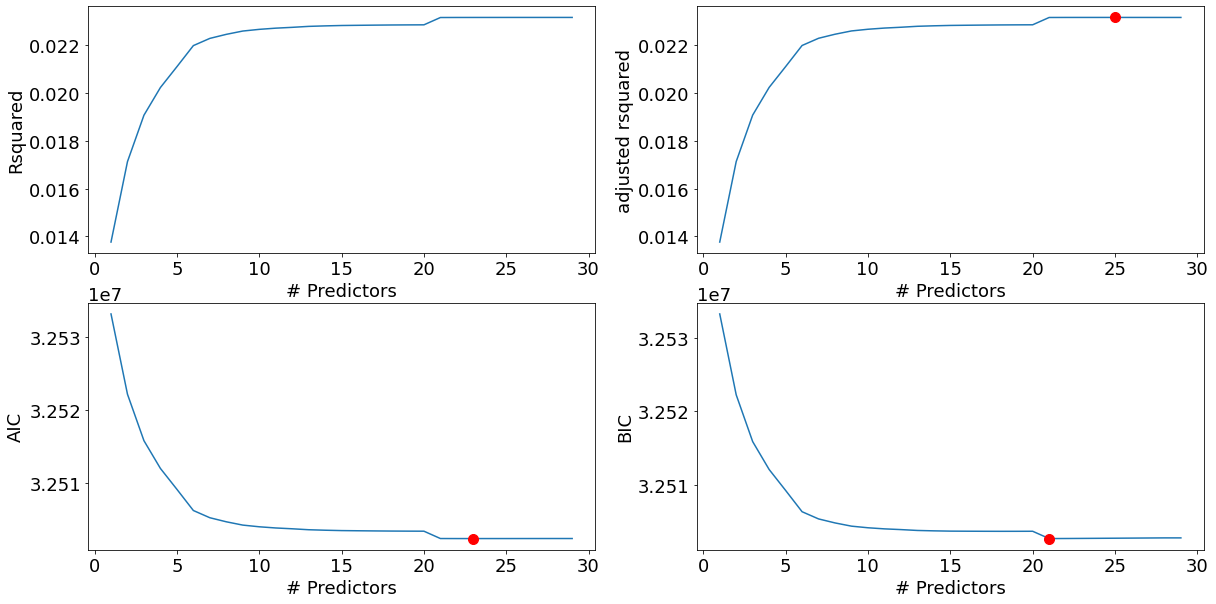

In [31]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [38]:
best_fwd_reg_model = models_best['model'][21]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        departure_delay   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3643.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:14:06   Log-Likelihood:            -1.6251e+07
No. Observations:             3225535   AIC:                         3.250e+07
Df Residuals:                 3225513   BIC:                         3.250e+07
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -32.7327      1.023    -32.001      0.000     -34.738     -30.728
scheduled_departure       0.0117   9.72e-05    120.412      0.000       0.012       0.012
taxi_out                  0.2225      0.002     93.490      0.000       0.218       0.227
airline_UA                5.0648      0.070     72.196      0.000       4.927       5.202
airline_AS               -6.5454      0.132    -49.559      0.000      -6.804      -6.287
scheduled_arrival         0.0048   9.22e-05     52.081      0.000       0.005       0.005
airline_NK                8.6090      0.161     53.342      0.000       8.293       8.925
day_of_week              -0.3387      0.010    -32.406      0.000      -0.359      -0.318
day_of_year              -1.0663      0.033    -32.041      0.000      -1.132      -1.001
taxi_in                   0.0705      0.004     19.002      0.000       0.063       0.078
origin_temperature       -0.0455      0.001    -31.097      0.000      -0.048      -0.043
origin_latitude          -0.0890      0.005    -19.378      0.000      -0.098      -0.080
origin_longitude          0.0076      0.002      3.338      0.001       0.003       0.012
distance                 -0.0007      0.000     -2.173      0.030      -0.001   -6.72e-05
state_destination_MI     -1.1317      0.130     -8.677      0.000      -1.387      -0.876
origin_airport_RIC        2.5466      0.346      7.354      0.000       1.868       3.225
origin_airport_IAD       -0.6513      0.171     -3.800      0.000      -0.987      -0.315
origin_airport_CMH        1.0760      0.202      5.322      0.000       0.680       1.472
destination_longitude     0.0103      0.002      5.574      0.000       0.007       0.014
scheduled_time            0.0092      0.003      3.586      0.000       0.004       0.014
month                    32.3694      1.014     31.932      0.000      30.383      34.356
day                       1.0587      0.033     31.794      0.000       0.993       1.124
==============================================================================
Omnibus:                  4317189.372   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1914127090.144
Skew:                           7.418   Prob(JB):                         0.00
Kurtosis:                     121.415   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
pred_price = (best_fwd_reg_model.predict(test))
np.sqrt(((pred_price - test.departure_delay)**2).mean())

37.46767057870129